In [3]:


%matplotlib inline
import matplotlib.pyplot as plt
import numpy
from tvb.simulator.lab import *



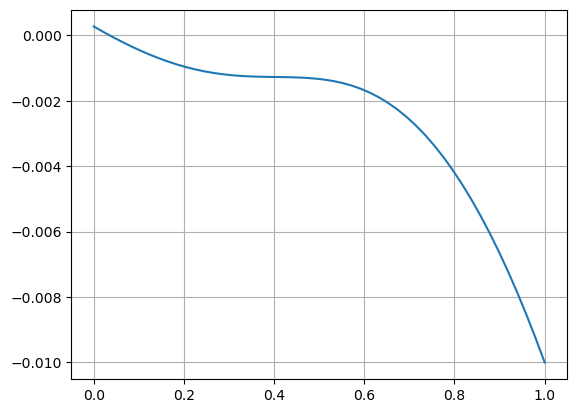

In [5]:


rww = models.ReducedWongWang(a=numpy.array([0.27]), w=numpy.array([1.0]), I_o=numpy.array([0.3]))
S = numpy.linspace(0, 1, 50).reshape((1, -1, 1))
C = S * 0.0
dS = rww.dfun(S, C)

plt.figure()
plt.plot(S.flat, dS.flat)
plt.grid(1)

WARNING  File 'hemispheres' not found in ZIP.


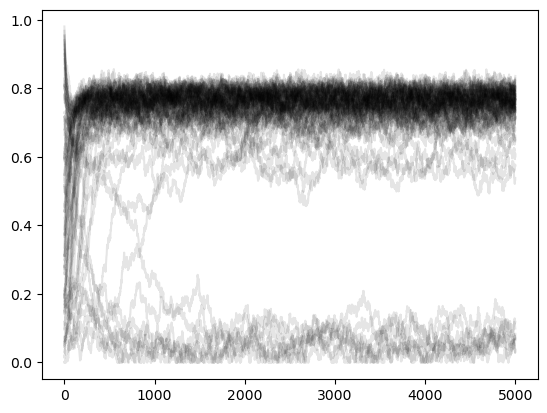

In [6]:
sim = simulator.Simulator(
    model=rww,
    connectivity=connectivity.Connectivity.from_file(),
    coupling=coupling.Linear(a=numpy.array([0.5 / 50.0])),
    integrator=integrators.EulerStochastic(dt=1, noise=noise.Additive(nsig=numpy.array([1e-5]))), 
    monitors=(monitors.TemporalAverage(period=1.),),
    simulation_length=5e3
).configure()

(time, data), = sim.run()

plt.figure()
plt.plot(time, data[:, 0, :, 0], 'k', alpha=0.1);